# Data Visualization: Leo's part

In [1]:
# import library used for data management
import numpy as np 
import pandas as pd

In [2]:
# load datasets
hotel = pd.read_csv('hotel_bookings.csv')

In [3]:
hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
hotel                             119390 non-null object
is_canceled                       119390 non-null int64
lead_time                         119390 non-null int64
arrival_date_year                 119390 non-null int64
arrival_date_month                119390 non-null object
arrival_date_week_number          119390 non-null int64
arrival_date_day_of_month         119390 non-null int64
stays_in_weekend_nights           119390 non-null int64
stays_in_week_nights              119390 non-null int64
adults                            119390 non-null int64
children                          119386 non-null float64
babies                            119390 non-null int64
meal                              119390 non-null object
country                           118902 non-null object
market_segment                    119390 non-null object
distribution_channel              119390 n

In [4]:
# import libraries for data visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure(figsize=(18,6))

<Figure size 1296x432 with 0 Axes>

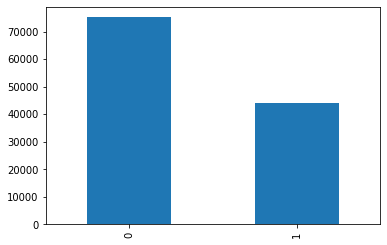

In [5]:
# Bar chart for is_canceled
hotel['is_canceled'].value_counts().plot(kind='bar')

In [6]:
# so many missing value for company
hotel=hotel.drop(labels=['company'],axis=1,inplace=False)

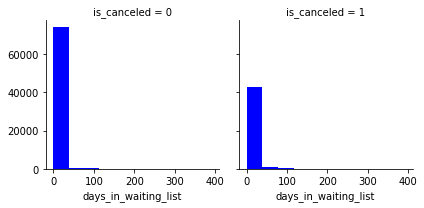

In [7]:
# for days_in_waiting_list
g = sns.FacetGrid(hotel, col='is_canceled', margin_titles=True)
g.map(plt.hist,'days_in_waiting_list',color='blue')
# seems that in the is_canceled=1 group, a larger proportion of people have longer days_in_waiting_list

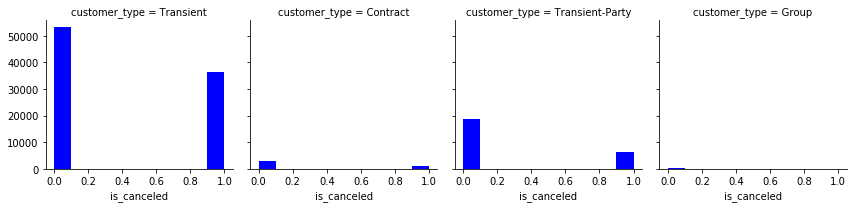

In [8]:
# for customer_type
g = sns.FacetGrid(hotel, col='customer_type', margin_titles=True)
g.map(plt.hist,'is_canceled',color='blue')

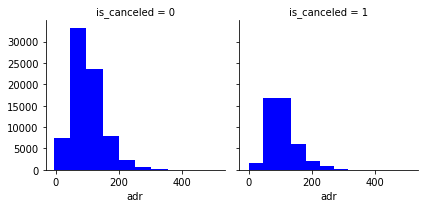

In [9]:
# for adr
hotel['adr'].describe()
mean_adr=hotel['adr'].mean()
std_adr=hotel['adr'].std()
a = np.array(hotel['adr'].values.tolist())
hotel['adr'] = np.where(a > (mean_adr+10*std_adr), mean_adr, a).tolist() # delete outlier
hotel['adr'].describe()
g = sns.FacetGrid(hotel, col='is_canceled', margin_titles=True)
g.map(plt.hist,'adr',color='blue')

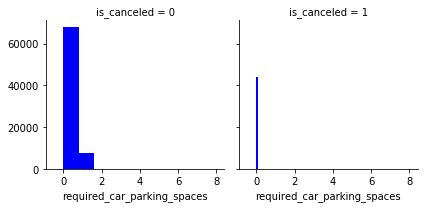

In [10]:
# for required_car_parking_spaces
hotel['required_car_parking_spaces'].describe()
g = sns.FacetGrid(hotel, col='is_canceled', margin_titles=True)
g.map(plt.hist,'required_car_parking_spaces',color='blue')

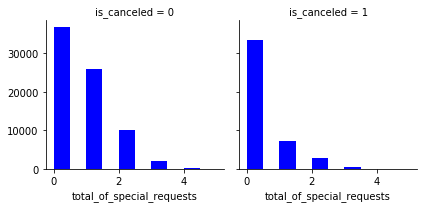

In [11]:
# for total_of_special_requests
hotel['total_of_special_requests'].describe()
g = sns.FacetGrid(hotel, col='is_canceled', margin_titles=True)
g.map(plt.hist,'total_of_special_requests',color='blue')

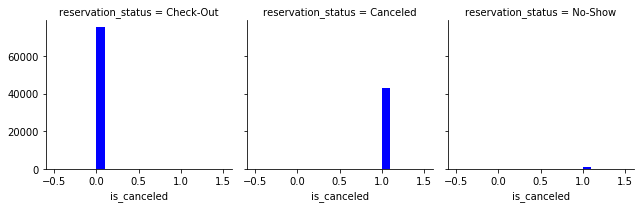

In [12]:
# for reservation_status
g = sns.FacetGrid(hotel, col='reservation_status', margin_titles=True)
g.map(plt.hist,'is_canceled',color='blue')
# This feature is not good, so as reservation_status_date